In [18]:
using LinearAlgebra, Plots, ForwardDiff

# Root Finding in a Single Variable

Given a function $f(x): \mathbb{R} \rightarrow \mathbb{R}$ find $x^*$ such that $f(x^*) = 0$.

Assumptions we make on f(.):

- Continuity

- Lipschitz continuity: A function $f$ is Lipschitz continuous if there exists a constant c such that $|f(x)-f(y)| \leq c|x-y|$. This limits the rate of change of the function.

- Differntiability

- $C^k$: A function is $C^k$ if it is $k$ times differentiable and each of those $k$ derivatives are continuous.

__Examples:__ $cos(x)$ is $C^{\infty}$ and Lipschitz on $\mathbb{R}$. $x^2$ is $C^{\infty}$ on $\mathbb{R}$ but not Lipschitz since its derivative is not limited and goes to $\infty$ in the limit. However it is Lipschitz in a specified interval such as $[0,1]$ since derivative is limited by $c=2$. $|x|$ is continuous and Lipschitz but not differentiable because the function is not smooth at $x=0$ and singular there. 

## Bisection

The simplest algorithm to find a root of a single variable function. Continuity of a function implies that if $f(a)<u<f(b)$ then there is a $a<z<b$ such that $f(z)=u$. Therefore given that $f(l) \cdot f(r) < 0$. There must be a value $x^*$ in the interval $(l,r)$ that satisfies $f(x^*) = 0$. 

In [2]:
function Bisection(f,l,r,eps1,eps2)
    cond = false
    x_star = NaN
    while cond == false
        c = (l+r)/2
        x_star = c
        if abs(f(c))<eps1 || abs(l-r)<eps2
            cond = true
        elseif f(l)*f(c) < 0
            r = c
        else
            l = c
        end
    end
    return x_star
end

Bisection (generic function with 1 method)

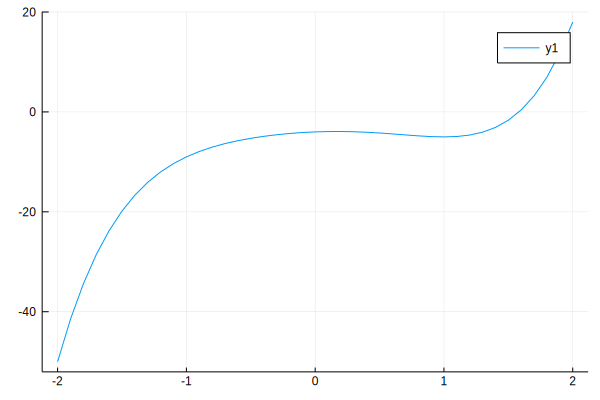

In [3]:
f(x) = x^5 - 3*x^2 + x - 4
x_vals = collect(-2:0.1:2)
f_vals = f.(x_vals)
plot(x_vals,f_vals)

In [4]:
Bisection(f,2,-2,0.01,0.01)

1.58203125

__Convergence analysis:__ Conditions (continuity, and $f(l_1) \cdot f(r_1)<0$) are satisfied, bisection algorithm converges in $k$ steps: $E_k \rightarrow 0$ for $E_k = |r_k - l_k|$. The rate of convergence is linear: $E_{k+1} = \frac{1}{2} E_k$. This is because the interval is diveded by two at each iteration. 

__Note:__ Finding $r_1$ and $l_1$ such that $x^* \in (r_1,l_1)$, in other words $f(l_1) \cdot f(r_1)<0$, is also a hard problem.

## Fixed Point Iteration

Suppose that we want to find $x^*$ such that $g(x^*) = x^*$. This is equivalent to finding the roots of $g(x^*) - x^*$. Assuming that $g(.)$ is Lipschitz continuous with constant $0 \leq c < 1$, $|g(x)-g(y)|<|x-y|$ and the following algorithm converges:

- Initilalize $x_0$

- Iterate $x_k \leftarrow g(x_{k-1})$

In [5]:
function FixedPointIteration(g,x_init,eps)
    x_old = x_init
    cond = false
    count = 1
    while cond == false
        x = g(x_old)
        error = abs(x-x_old)
        if error<eps
            cond = true
        else
            count += 1
        end
        x_old = x
        if count > 1000
            cond = true
        end
    end
    return x_old
end

FixedPointIteration (generic function with 1 method)

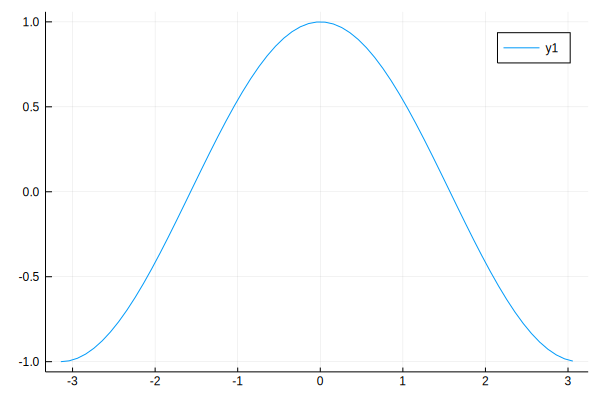

In [6]:
f(x) = cos(x)
x_vals = collect(-pi:0.1:pi)
f_vals = f.(x_vals)
plot(x_vals,f_vals)

In [7]:
FixedPointIteration(f,0,0.001)

0.7387603198742114

__Convergence analysis:__ $E_k = |x_k - x^*| = |g(x_{k-1}-g(x^*))|$

If $|g(x)-g(y)|<|x-y|$,

$|g(x_{k-1}-g(x^*))| \leq c |x_k - x^*| = c E_{k-1}$. Therefore $E_k \leq c^{k}E_0 \rightarrow 0$ as $k \rightarrow \infty$. Otherwise it diverges.

In [8]:
#Divergence example
f(x) = x^5 - 3*x^2 + x - 4
FixedPointIteration(f,0,0.001) #result after 1000 iterations

-8093997620220668896

In [9]:
f(-8093997620220668896)

-8615648534452713444

The algorithm converges if the $x_0$ is chosen in an interval where $g(.)$ is locally Lipschitz continuous with constant $0 \leq c < 1$ although it is not globally the case.

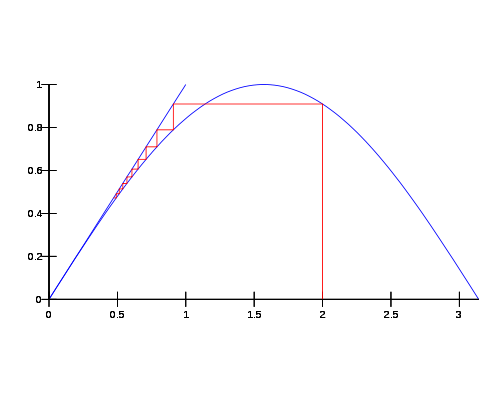

In [10]:
#Fixed point iteration for sin(.) with x_0 = 2
# Image is taken from Wikipedia
display("image/png", read("fixedpoint.png"))

In [11]:
f(x) = sin(x)
FixedPointIteration(f,2,0.01)

0.3803757974172909

In [12]:
f(x) = sin(x)
FixedPointIteration(f,2,0.001)

0.17995254959145557

In [13]:
f(x) = sin(x)
FixedPointIteration(f,2,0.0001)

0.08415996781732862

In [14]:
f(x) = sin(x)
FixedPointIteration(f,2,0.000001)

0.05460664743047168

In [15]:
sin(0)

0.0

## Newton's Method

Consider a function $f(x)$ satisfies $C^1$. We want to find $x^*$ s.t. $f(x^*)=0$. First order Taylor series expansion of this function around $x_k$ is $f(x) \approx f(x_k) + f^{'}(x_k)(x-x_k)$. Then $f(x_k) + f^{'}(x_k)(x_{k+1} - x_k) = 0 => x_{k+1} = x_{k} - \frac{f(x_k)}{f^{'}(x_k)}$. Many of the functions can not be approximated well with first order Taylor series expansion. However, it is reasonable to hope that $x_{k+1}$ is closer to $x^*$ than $x_{k}$ is. Thus applying this formula iteratively may converge to a root of the function.

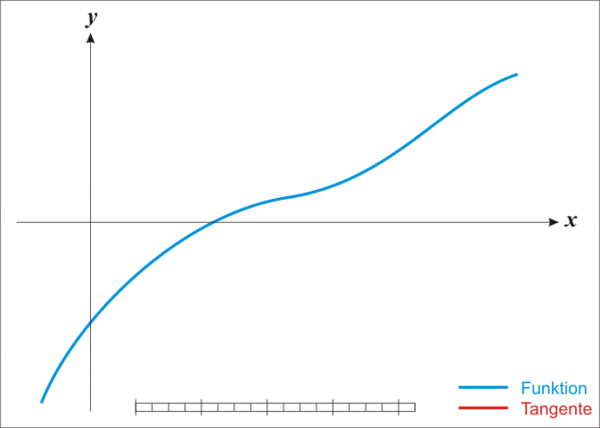

In [17]:
# Image is taken from Wikipedia
display("image/gif", read("NewtonRootFind.gif"))

In [19]:
function Newton(f,x_init,eps)
    df(x) = ForwardDiff.derivative(f,x)
    x = x_init
    x_old = x
    cond = false
    while cond == false
        x = x - f(x)/df(x)
        if abs(x-x_old)<eps
            cond = true
        else
            x_old = x
        end
    end
    return x
end

Newton (generic function with 1 method)

In [20]:
f(x) = x^5 - 3*x^2 + x - 4
Newton(f,-2,0.001)

1.5827492055596306

__Convergence Analysis:__ Stating the iterative update rule $x_{k+1} = x_{k} - \frac{f(x_k)}{f^{'}(x_k)}$ as a function $g(x) = x - \frac{f(x)}{f^{'}(x)}$ we want algortihm to converge to $x^*$ s.t. $f(x^*)=0$. The convergence is satisfied if $g^{'}(x^*)=0$ where
$$
g^{'}(x) = 1 - \frac{f^{'}(x)^2 - f(x)f^{''}(x)}{f^{'}(x)^2} = \frac{f(x)f^{''}(x)}{f^{'}(x)^2}.
$$
Therefore Newton's method converges quadratically if the initialization is made close to a simple root ($f(x^*)=0, f^{'}(x^*) \neq 0$). When $x^*$ is not simple, convergence is linear or worse.

## Secant Method

It can be costly to compute the derivative of a function in certain applications. Instead we can approximately compute derivative by $f^{'}(x_k) \approx \frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}$ and plug it into Newton's method iterative update rule. This requires two initial points or this can be achieved by taking derivative at first step.

In [22]:
function Secant(f,x_init0,x_init1,eps)
    df(x_1,x_0) = (f(x_1)-f(x_0))/(x_1-x_0)
    x_recent = x_init1
    x = x_init1
    x_old = x_init0
    cond = false
    while cond == false
        x = x - f(x)/df(x,x_old)
        if abs(x-x_old)<eps
            cond = true
        else
            x_old = x_recent
            x_recent = x
        end
    end
    return x
end

Secant (generic function with 1 method)

In [24]:
f(x) = x^5 - 3*x^2 + x - 4
Secant(f,-2,2,0.001)

1.5827488502110827

__Convergence Analysis:__ Convergence rate of Secant method is "Golden ration" $\frac{1+\sqrt{5}}{2}$ which is better than linear but worse that quadratic. Full analysis can be found at https://www.math.drexel.edu/~tolya/300_secant.pdf.

# Multivariable Problems

Given a function $\mathbb{R}^n \rightarrow \mathbb{R}^m$, find $\mathbf{x}^*$ s.t. $f(\mathbf{x}^*) = \mathbf{0}$.

## Newton's Method

$f(\mathbf{x}) \approx f(\mathbf{x}_k) + \mathcal{J}_{f}(\mathbf{x}_k)(\mathbf{x} - \mathbf{x}_k)$, where $\mathcal{J}_{f}(\mathbf{x}_k)$ is Jacobian of $f(.)$ evaluated at $\mathbf{x}_k$. Setting this first order Taylor series approximation of the function to zero, we find:
$$
\mathcal{J}_{f}(\mathbf{x}_k)(\mathbf{x}_{k+1}-\mathbf{x}_k) = -f(\mathbf{x}_k)
$$
In case $m=n$, this reduces to:
$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \mathcal{J}^{-1}_{f}(\mathbf{x}_k) f(\mathbf{x}_k)
$$
Handling the iterative process as fixed point iteration by setting $\mathbf{x}_{k+1} = g(\mathbf{x}_k)$, the algorithm converges if the maximum of absolute values of eigenvalues for $\mathcal{J}_{g}$ is less then 1. The reason can be better understood if we associate $\mathcal{J}_{g}$ with the term $(\mathbf{x}_{k+1}-\mathbf{x}_k)$. $(\mathbf{x}_{k+1}-\mathbf{x}_k)$ is multiplied by matrices over nad over again and for this multiplication to be not to explode (diverge), we need the maximum of absolute values of eigenvalues for $\mathcal{J}_{g}$ to be less then 1.

## Quasi Newton and Broyden Method

For large $m$ and $n$, it becomes costly to calculate the Jacobian and its inverse at each iteration step. Instead of exact values of Jacobian and its inverse, we can approximate them throughout the optimization procedure. This is similar to secant method for single random variables: $\mathcal{J}_{f_k}\cdot(\mathbf{x}_k-\mathbf{x}_{k-1}) = f(\mathbf{x}_k) -f(\mathbf{x}_{k-1})$ where $\mathcal{J}_{f_k}$ is the Jacobian approximation. This approximation is based on the ideas that we start with an initial Jacobian estimation and we want to converge to such $\mathbf{x}$ values that the Jacobian estimation will not change so much. We expect such a behaviour, because as the Newton's method converge to a root, $\mathbf{x}_k$ does not change too much in the next iterations, so does the Jacobian estimation. This can be expressed with the following constrained optimization problem:

$$
\underset{\mathcal{J}_{f_k}}{\text{min }} ||\mathcal{J}_{f_k} - \mathcal{J}_{f_{k-1}}||^2_{\text{Fro}} \\
\text{subject to } \mathcal{J}_{f_k}\cdot(\mathbf{x}_k-\mathbf{x}_{k-1}) = f(\mathbf{x}_k) -f(\mathbf{x}_{k-1})
$$

Definining the followings: $\Delta\mathcal{J} := \mathcal{J}_{f_k} - \mathcal{J}_{f_{k-1}}$, $\Delta\mathbf{x} := \mathbf{x}_k-\mathbf{x}_{k-1}$ and $\mathbf{d}:=f(\mathbf{x}_k) -f(\mathbf{x}_{k-1})-\mathcal{J}_{f_{k-1}}\cdot\Delta\mathbf{x}$, we can rewrite the objective as

$$
\underset{\Delta\mathcal{J}}{\text{min }} ||\Delta\mathcal{J}||^2_{\text{Fro}} \\
\text{subject to } \Delta\mathcal{J} \cdot \Delta\mathbf{x} = \mathbf{d}
$$

Lagrangian turns out to be: $\Lambda = ||\Delta\mathcal{J}||^2_{\text{Fro}} + \mathbf{\lambda}^T(\Delta\mathcal{J} \cdot \Delta\mathbf{x}-\mathbf{d})$

Details of the solution is given at "Numerical Algorithms" by Justin Solomon.

Broyden-Inverted method is a better approach compared to Broyden since it directly estimates the inverse of the Jacobian and use it inside Newton's method. Broyden method can easily be transformed to Broyden-Inverted method by using Sherman Morrison's formula https://en.wikipedia.org/wiki/Sherman–Morrison_formula.